# Analysis of Donald Trump's tweets from 1st Jan 2015 till 1st Mar 2020

The tweets are downloaded from http://www.trumptwitterarchive.com/.
I have used a csv file to store the tweets from 1st Jan 2015 till 1st March 2020.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir(r'C:\Users\sriva\Desktop\ISM6930_Text_Analytics\Raj_Ankit_Assignment01')
os.getcwd()

'C:\\Users\\sriva\\Desktop\\ISM6930_Text_Analytics\\Raj_Ankit_Assignment01'

#### Imported the csv file into pandas dataframe

In [4]:
trump_tweets = pd.read_csv('TrumpTweets.csv')
trump_tweets.head(5)

,"source,text,created_at,retweet_count,favorite_count,is_retweet,id_str"
0,"Twitter for iPhone,Congratulations to Sleepy J..."
1,"Twitter for iPhone,Democrats are working hard ..."
2,"Twitter for iPhone,Sleepy Joe Biden’s victory ..."
3,"Twitter for iPhone,THE BEST IS YET TO COME! ht..."
4,"Twitter for iPhone,Dana you are the real deal!..."


As the csv doesn't have data segregated over different columns, the first step is to separate the data stored in a single column to multiple columns.

#### Creating a list to store column names

In [5]:
column_string = ''
for column in trump_tweets.columns.values:
    column_string += column
list_of_columns = column_string.split(',')
list_of_columns

['source',
 'text',
 'created_at',
 'retweet_count',
 'favorite_count',
 'is_retweet',
 'id_str']

Stored the column names as a list and changed the column name to 1 to ease their use over the next steps.

In [6]:
trump_tweets.columns = [1]
trump_tweets.head(5)

,1
0,"Twitter for iPhone,Congratulations to Sleepy J..."
1,"Twitter for iPhone,Democrats are working hard ..."
2,"Twitter for iPhone,Sleepy Joe Biden’s victory ..."
3,"Twitter for iPhone,THE BEST IS YET TO COME! ht..."
4,"Twitter for iPhone,Dana you are the real deal!..."


#### Splitted csv data over multiple columns

In [7]:
trump_tweets = trump_tweets[1].str.split(',', expand = True)
trump_tweets.head(5)

,0,1,2,3,4,5,6
0,Twitter for iPhone,Congratulations to Sleepy Joe Biden!,03-01-2020 04:49:32,10662,72718,false,1233977649552384005
1,Twitter for iPhone,Democrats are working hard to destroy the name...,03-01-2020 04:45:36,15430,82276,false,1233976658572566529
2,Twitter for iPhone,Sleepy Joe Biden’s victory in the South Caroli...,03-01-2020 00:16:33,17786,85913,false,1233908953026908161
3,Twitter for iPhone,THE BEST IS YET TO COME! https://t.co/C0RicMRP0Z,02-29-2020 23:42:15,25497,84089,false,1233900317923672064
4,Twitter for iPhone,Dana you are the real deal! https://t.co/nAGDn...,02-29-2020 23:10:24,23085,97899,false,1233892301791023106


#### Renamed the column names with the actual variable names

In [8]:
trump_tweets.columns = list_of_columns

#### Dropped the variables that aren't required for our analysis

In [9]:
trump_tweets = trump_tweets.drop(['source', 'id_str', 'is_retweet'], axis = 1)
trump_tweets.rename(columns = {'created_at' : 'date_of_tweet'}, inplace=True)

#### Segregated the tweets yearwise

In [10]:
trump_tweets['year'] = pd.DatetimeIndex(trump_tweets['date_of_tweet']).year
trump_tweets.head(5)

,text,date_of_tweet,retweet_count,favorite_count,year
0,Congratulations to Sleepy Joe Biden!,03-01-2020 04:49:32,10662,72718,2020
1,Democrats are working hard to destroy the name...,03-01-2020 04:45:36,15430,82276,2020
2,Sleepy Joe Biden’s victory in the South Caroli...,03-01-2020 00:16:33,17786,85913,2020
3,THE BEST IS YET TO COME! https://t.co/C0RicMRP0Z,02-29-2020 23:42:15,25497,84089,2020
4,Dana you are the real deal! https://t.co/nAGDn...,02-29-2020 23:10:24,23085,97899,2020


In [11]:
trump_tweets.dtypes

text              object
date_of_tweet     object
retweet_count     object
favorite_count    object
year               int64
dtype: object

#### Fixing the datatypes of our target variables

In [12]:
trump_tweets['date_of_tweet'] = pd.to_datetime(trump_tweets['date_of_tweet'])
trump_tweets['retweet_count'] = pd.to_numeric(trump_tweets['retweet_count'])
trump_tweets['favorite_count'] = pd.to_numeric(trump_tweets['favorite_count'])

In [13]:
trump_tweets.dtypes

text                      object
date_of_tweet     datetime64[ns]
retweet_count              int64
favorite_count             int64
year                       int64
dtype: object

#### As we have all the variables in the datatype required for our analysis, we can group our data for each year

In [16]:
trump_tweets_grouped_by_year = trump_tweets.groupby('year')
trump_tweets_grouped_by_year.groups.keys()

dict_keys([2015, 2016, 2017, 2018, 2019, 2020])

In [15]:
trump_tweets_grouped_by_year.head(2)

,text,date_of_tweet,retweet_count,favorite_count,year
0,Congratulations to Sleepy Joe Biden!,2020-03-01 04:49:32,10662,72718,2020
1,Democrats are working hard to destroy the name...,2020-03-01 04:45:36,15430,82276,2020
1865,RT @WhiteHouse: Americans saw plenty of Washin...,2019-12-31 23:35:58,10643,0,2019
1866,How is the Paris Accord doing? Don’t ask! http...,2019-12-31 23:25:01,14250,54657,2019
9683,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,2018-12-31 23:53:06,32999,132907,2018
9684,Heads of countries are calling wanting to know...,2018-12-31 20:02:52,20519,74566,2018
13251,HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...,2017-12-31 23:43:04,35394,156032,2017
13252,As our Country rapidly grows stronger and smar...,2017-12-31 22:18:20,39698,158995,2017
15853,RT @realDonaldTrump: Happy Birthday @DonaldJTr...,2016-12-31 18:59:04,9529,0,2016
15854,Happy Birthday @DonaldJTrumpJr!https://t.co/uR...,2016-12-31 18:58:12,9529,55601,2016


#### Importing the libraries required for our data preprocessing

In [15]:
from string import punctuation
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Used nltk's corpus to find the english stopwords
stopwords = nltk.corpus.stopwords.words('english')
#stopwords

#### Data preprocessing, word & tweeter handles frequency analysis and sentiment analysis

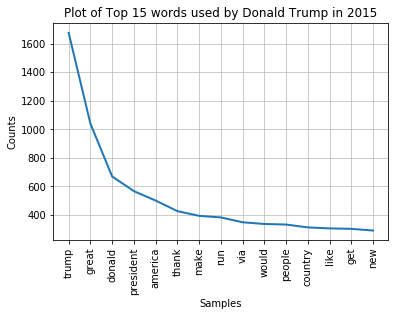

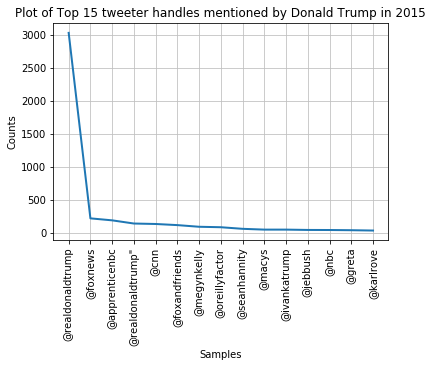

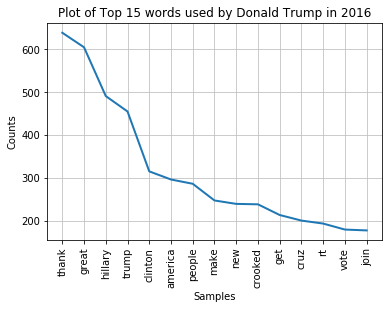

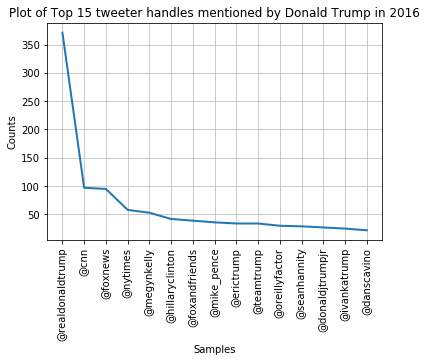

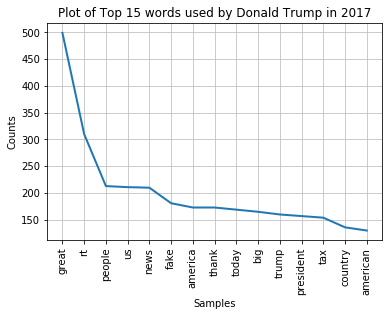

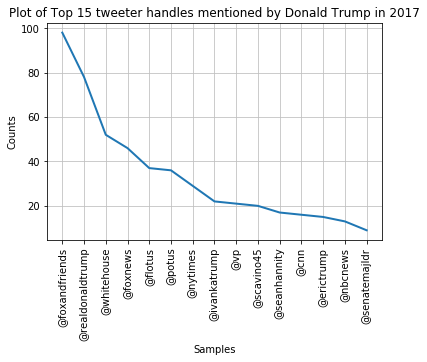

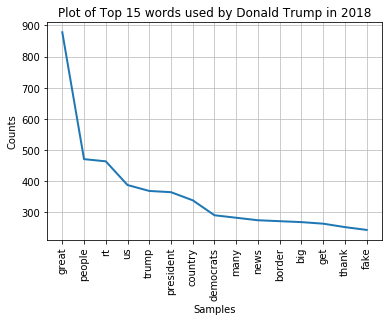

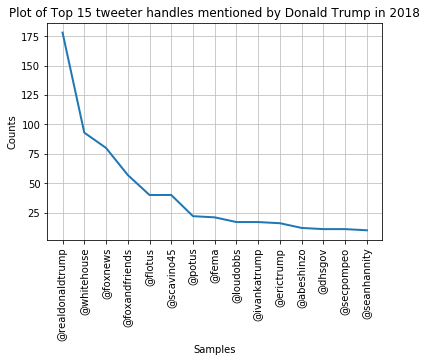

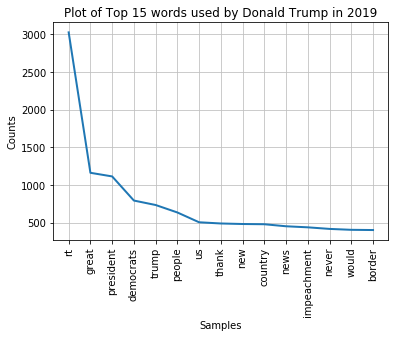

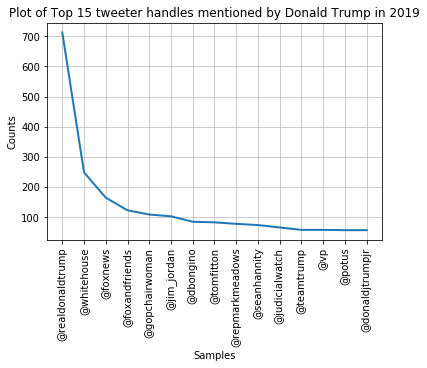

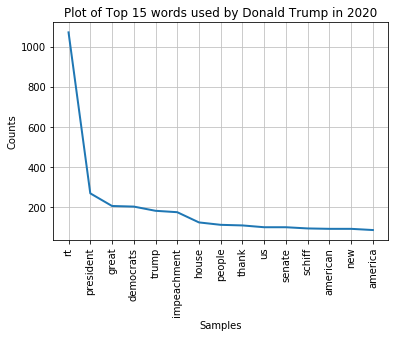

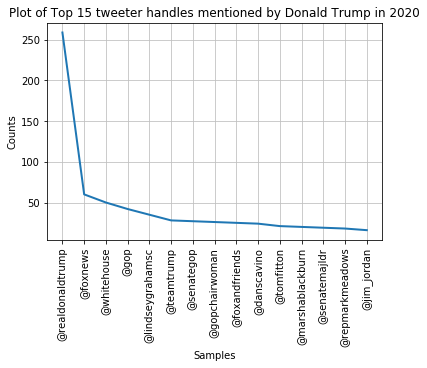

In [16]:
# A dataframe to store the polarity score of the words used in the tweets over the years.
polarity_df = pd.DataFrame()

# Used a for loop to perform data preprocessing over the years
for year in trump_tweets_grouped_by_year.groups.keys():
    trump_tweets_df = trump_tweets_grouped_by_year.get_group(year)
    
    tweet_string = ''
    tweet_list = []
    
    #Used a for loop to populate the tweet string with the text value for each index.
    for i in trump_tweets_df.index:
        tweet_string = tweet_string + ' ' + trump_tweets_df.loc[i, 'text']
        tweet_list.append(trump_tweets_df.loc[i, 'text'])
        
    #Removed punctuation, and removed '.' manually as strip doesn't remove the end of the sentence punctuation.
    tweet_string = tweet_string.strip(punctuation).lower().replace('.', '')

    #Removed URLs using re
    tweet_string = re.sub(r'http\S+', ' ', tweet_string)
    
    #Tokenized the tweet string and removed the stop words
    tweet_words = tweet_string.split()
    tweet_words = [word for word in tweet_words if word not in stopwords]
    tweet_words = [word for word in tweet_words if word not in ['amp', 'u']]
    
    #Created a list to store the handles, initiated by @, mentioned in the tweets
    handles = []
    for word in tweet_words:
        if re.search(r'^@\w+', word):
            handles.append(word)
    
    #Removed the alphanumeric characters from the handles
    handles = [re.sub(r'[!?:\.]+', '', h) for h in handles]
    
    # Used Nltk's frequency distribution to calculate the frequencies of the handles mentioned in that year
    freq_handles = nltk.FreqDist(handles)
    
    # As tweeter handles has been stored in a separate list
    # Used re.sub to substitute symbols with a space
    tweet_string = re.sub(r'@\S+', ' ', tweet_string)
    tweet_string = re.sub(r'#\S+', ' ', tweet_string)
    tweet_string = re.sub(r'[^a-z\s]+', ' ', tweet_string)
    tweet_string = re.sub(r'\s\w\s', ' ', tweet_string)
    
    # Used nltk's word tokenize to tokenize the filtered tweet string again
    # Removed stop words, and unnecessary symbols from the tokenized words
    tweet_words = nltk.tokenize.word_tokenize(tweet_string)
    tweet_words = [word for word in tweet_words if word not in stopwords]
    tweet_words = [word for word in tweet_words if word not in ['amp', 'u']]
    tweet_words = [word for word in tweet_words if word.isalpha()]
    
    # Used Nltk's frequency distribution to calculate the frequencies of the words
    freq_words_in_tweet = nltk.FreqDist(tweet_words)
    freq_words_in_tweet
    
    #Analysis of frequently tweeted words - top 15
    freq_words_in_tweet.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump in %s'%year)
    
    # Analysis of frequently mentioned tweeter handles - top 15
    freq_handles.plot(15, cumulative=False, title='Plot of Top 15 tweeter handles mentioned by Donald Trump in %s'%year)
 
    # Calculated polarity of tweets each year
    sentiment = {}
    sentiment_analyzer = SentimentIntensityAnalyzer()
    polarity = [0]*len(tweet_list)
    for i, tweet in enumerate(tweet_list):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        sentiment[i] = sentiment_analyzer.polarity_scores(tweet)
        polarity[i] = sentiment[i]['compound']
       
    # Appending the polarity of the words to the dataframe polarity_df
    # With the year in iteration as the column name
    polarity_df[year] = pd.Series(polarity)

#### Analysis of the top 15 most frequently used words

Taking a look at Donald Trump's most frequently used words in the years 2015 & 2016, when he was not the president, we can observe that the most frequently used words, both in 2015 & 2016, include trump, make, america, great, etc.
In 2016, the words hillary and clinton are among his most frequently used words, and interestingly he contented against Hillary Clinton for the Presidential election in 2016.

In the years 2017 & 2018, after Donald Trump became the President of US, words like great, people, president, country, news, etc. are among the most frequently used words. 
What's interesting here is that the words news & fake are among the top 15 words used in 2017 & 2018, and justifiably so as the President has always raised his concern towards the fake news.

Looking at the frequencies of top 15 words in 2019 & 2020, the top 5 words are rt, great, president, trump and democrats, but as we just have 2 months of data for 2020, we can't exactly say if the frequently used words would remain the same throughout the year.
It is, however, interesting to notice that the word impeachment is one of the most frequently used word in 2019, and 2020 for the 2 months, and so have been Donald Tump's tweets arguing in his defense in the impeachment trial.

#### Analysis of the most frequently mentioned tweeter handles

The distributions of top 15 most frequently mentioned tweeter handles over the years highlight the trend of how President Trump has mentioned tweeter handles in his tweets over the years.

We can notice, for instance, that @realdonaldtrump is the the most commonly used twitter handle throughout 2015-2020, with the exception of 2017, but still it was the second most frequently mentioned tweeter handle. 

The ranking may have changed over the years, but it is interesting to know that the trends in the tweeter handles overlap with each other.

A few such trends are:

•	@foxnews and @realdonaldtrump are in top 5 for all the 6 years.
•	@cnn has been in the top 15 in the years 2015, 2016 and 2017.
•	@whitehouse has been among the top 3 in the year 2017 and following (after Donald Trump became the President)


##### Checking if our polarity_df is populated for each year

In [17]:
polarity_df.head()

,2015,2016,2017,2018,2019,2020
0,0.9559,0.6114,0.8439,0.6114,-0.6673,0.5994
1,-0.4939,0.6114,0.8841,0.8652,0.0000,-0.7430
2,0.7814,-0.4388,-0.2456,-0.2228,-0.1759,-0.4404
3,0.8261,0.2003,0.8650,-0.8762,0.0000,0.6696
4,-0.5267,0.6249,0.6114,0.5267,0.0000,0.0000


#### Polarity Distribution over the years

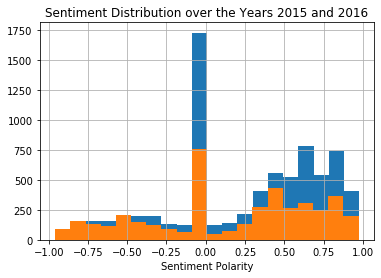

In [18]:
plt.title('Sentiment Distribution over the Years 2015 and 2016')
plt.xlabel('Sentiment Polarity')
polarity_df[2015].hist(bins=20) #blue
polarity_df[2016].hist(bins=20) #orange

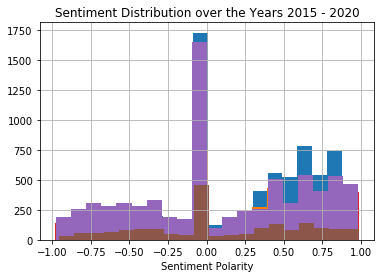

In [19]:
for year in trump_tweets_grouped_by_year.groups.keys():
    plt.title('Sentiment Distribution over the Years 2015 - 2020')
    plt.xlabel('Sentiment Polarity')
    polarity_df[year].hist(bins=20)

#### Sentiment Analysis of the most frequenctly used words over the years

Looking at the frequency distribution plot above, we can observe how the sentiment in the tweets have changed over the years. 

It's interesting to notice that over all the years President Trump has used  more neutral words than positive or negative words.

And even if we are considering only the positive or negative words, the frequency of positive words is more than the frequency of negative words.